In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = 1

In [4]:
j = janet.boot(uni, index=index, use_prior=False)
j.prepare_data()

Already have data downloaded for Gaia ID 2174289161681454720.
If you want to check for new data, run `janet.update()`.
Removing 186 bad data points (out of 1121) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median
Removing 4 bad data points (out of 1130) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median


Running pixels in aperture: 100%|████████████| 300/300 [00:00<00:00, 327.65it/s]


In [8]:
list(j.void)

['datum_16',
 'clc_16',
 'datum_17',
 'clc_17',
 'clc_all',
 'clc_16-17',
 'cpmlc_16',
 'cpm_16',
 'cpmlc_17',
 'cpm_17',
 'cpmlc_16-17',
 'r_16-17',
 'rlc_16-17']

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

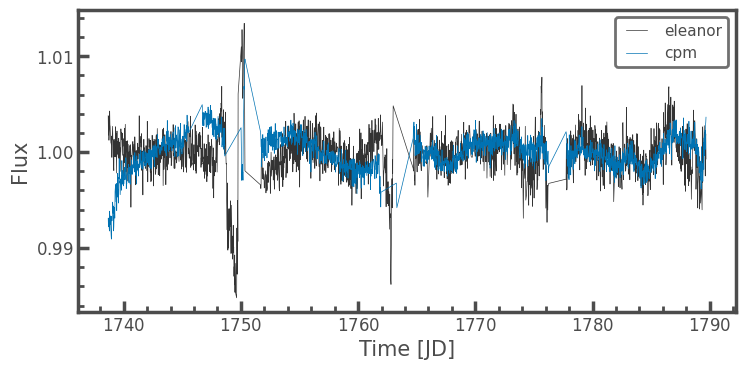

In [11]:
ax = j.void['clc_16-17'].plot(label='eleanor')
j.void['cpmlc_16-17'].plot(ax=ax, label='cpm')
j.void['rlc_16-17']

In [79]:
rowlims

array([25, 26])

## graveyard

In [ ]:
sys.exit()

In [ ]:
sys.exit()


In [ ]:
obs = {
    'Teff' : [uni.loc[index, 'Teff'], uni.loc[index, 'e_Teff']],
    'logg' : [uni.loc[index, 'logg'], uni.loc[index, 'e_logg']],
    'MG' : [uni.loc[index, 'MGna'], uni.loc[index, 'e_MGna']],
    'bp_rp' : [uni.loc[index, 'bp_rp'], uni.loc[index, 'e_bp_rp']]
}

obs['logT'] = [0., 0.]
obs['logT'][0] = np.log10(obs['Teff'][0])
obs['logT'][1] = obs['Teff'][1] / (np.log(10)*obs['Teff'][0])

obs['logbp_rp'] = [0., 0.]
obs['logbp_rp'][0] = np.log10(obs['bp_rp'][0])
obs['logbp_rp'][1] = obs['bp_rp'][1] / (np.log(10)*obs['bp_rp'][0])

# Assume 10% uncertainty in absence of errors
for col in ['Teff','logg','MG','bp_rp']:
    if not np.isfinite(obs[col][1]):
        obs[col][1] = 0.1*obs[col][0]
        
    if not np.isfinite(obs[col][0]):
        obs = None
        use_prior = False
        print('Not enough information to use the prior until we allow for it.')
        break